## 导入数据和必要的包

In [32]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch 
import pandas as pd
import numpy as np

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)

In [4]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = housevalue.target

In [6]:
X.shape

(20640, 8)

In [7]:
y.shape

(20640,)

In [8]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
"""
MedInc：该街区住户的收⼊入中位数
HouseAge：该街区房屋使⽤用年年代的中位数
AveRooms：该街区平均的房间数⽬
AveBedrms：该街区平均的卧室数⽬
Population：街区⼈人⼝
AveOccup：平均⼊入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收⼊入中位数\nHouseAge：该街区房屋使⽤用年年代的中位数\nAveRooms：该街区平均的房间数⽬目\nAveBedrms：该街区平均的卧室数⽬目\nPopulation：街区⼈人⼝口\nAveOccup：平均⼊入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [13]:
Xtrain.shape

(14448, 8)

## 建立LR模型

In [14]:
reg = LR().fit(Xtrain,Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [15]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
# 相关系数
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [17]:
# 截距
reg.intercept_

-36.256893229204024

## 线性回归的评估指标 均⽅误差MSE

In [18]:
from sklearn.metrics import mean_squared_error as MSE

In [19]:
MSE(yhat,Ytest)

0.5309012639324581

In [20]:
y.max()

5.00001

In [21]:
y.min()

0.14999

In [22]:
cross_val_score(reg,X,y,cv=10,scoring='mean_squared_error')

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [23]:
import sklearn

In [24]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [25]:
# 越趋近于0越好
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [26]:
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_absolute_error')

array([-0.5351668 , -0.52910504, -0.67851477, -0.47485745, -0.65197842,
       -0.50092187, -0.39629861, -0.64006268, -0.60286176, -0.435447  ])

## R方

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2 = reg.score(Xtest,Ytest)
r2

0.604366816017881

In [30]:
r2_score(Ytest,yhat)

0.604366816017881

## 预测值和真实值数据分布

In [33]:
import matplotlib.pyplot as plt
import numpy as np
#如果现在对Ytest直接绘图，会得到什什么结果？

<Figure size 640x480 with 1 Axes>

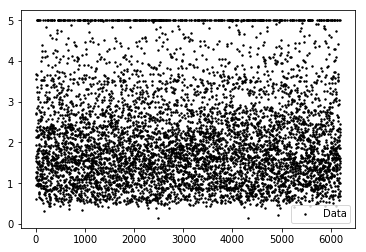

In [34]:
plt.scatter(range(len(Ytest)),Ytest,c="black",label= "Data",s=2)
plt.legend()
plt.show()

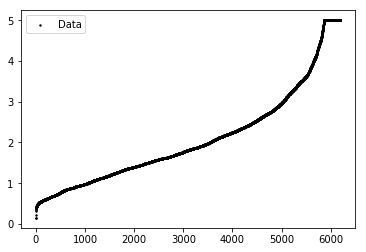

In [35]:
plt.scatter(range(len(Ytest)),sorted(Ytest),c="black",label= "Data",s=2)
plt.legend()
plt.show()

In [36]:
ind = np.argsort(Ytest)
ind

array([2477, 4318, 4930, ..., 2806, 2786, 3736], dtype=int64)

In [37]:
Ytest.min()
Ytest.tolist().index(Ytest.min())
sorted(Ytest)

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

In [38]:
yhat = pd.DataFrame(yhat)
yhat = pd.DataFrame(yhat,index=ind)
yhat

,0
2477,1.053998
4318,0.190345
4930,1.923386
173,2.046919
948,1.040453
679,1.512761
4660,1.193491
2291,1.069131
4973,0.330080
2708,0.748782


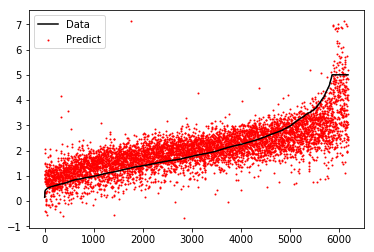

In [39]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.scatter(range(len(yhat)),yhat,c="red",label = "Predict",s=1)
plt.legend()
plt.show()

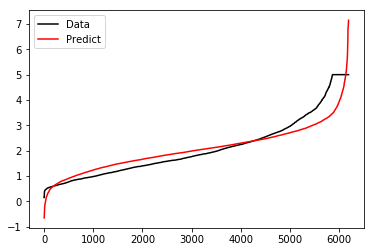

In [40]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat.iloc[:,0]),c="red",label = "Predict")
plt.legend()
plt.show()

## 负的R方

In [36]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-178.66948656,   -5.72449413,  -15.46335651,  -76.11856972,
        -67.17125997])

## 岭回归消除多重共线性

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [38]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年年代中位数","平均房间数⽬目","平均卧室数⽬目","街区⼈人⼝口","平均⼊入住率","街区的纬度","街区的经度"]
X.head()
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [39]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

### 岭回归消除多重共线性(不能提升模型效果）

In [41]:
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043610352312281

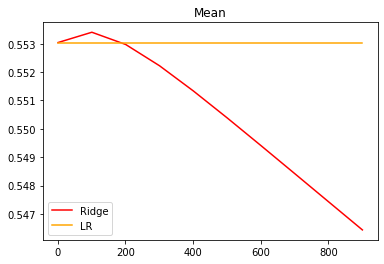

In [42]:
#交叉验证下，与线性回归相⽐比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

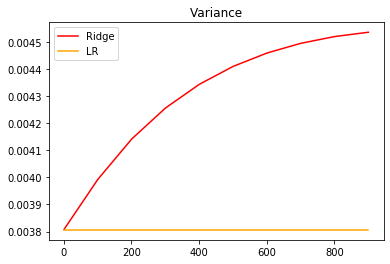

In [43]:
#模型⽅差如何变化？
# fetch_california_housing数据集
alpharange = np.arange(1,1001,100)
ridge, lr = [],[]
for alpha in alpharange:
     reg = Ridge(alpha=alpha)
     linear = LinearRegression()
     varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
     varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
     ridge.append(varR)
     lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

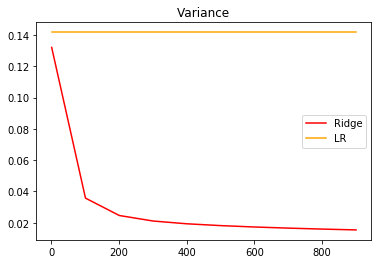

In [46]:
# 波士顿数据集
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
X = load_boston().data
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#先查看⽅方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

### R方的的变化

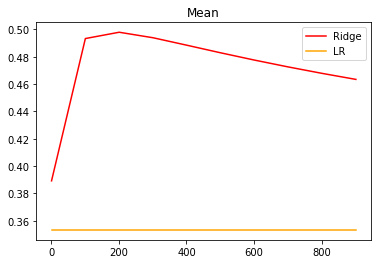

In [45]:
alpharange = np.arange(1,1001,100)
ridge, lr a= [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

### RidgeCV选取最佳的正则化参数取值

In [77]:
from sklearn.linear_model import RidgeCV, LinearRegression
Ridge = RidgeCV(alphas=np.arange(1,1001,100),store_cv_values=True).fit(Xtrain,Ytrain)

In [53]:
#调⽤所有交叉验证的结果
Ridge.cv_values_.mean(axis=0)

array([24.73964365, 26.34327554, 27.28049982, 27.90931599, 28.38729533,
       28.78143806, 29.12316309, 29.42898156, 29.70844163, 29.96751894])

In [57]:
#进⾏平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge.cv_values_.shape

(354, 10)

In [58]:
#查看被选择出来的最佳正则化系数
Ridge.alpha_

1

## LinearRegression、Ridge岭回归和Lasso回归比较

In [78]:
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[-5.913607075215629,
 3.5900576386872953,
 -1.7584848872372054,
 349.9919091188408,
 -1591.5451753183788,
 387.51668966069,
 0.5925076080657656,
 -124.19587601183355,
 32.07247782109699,
 -1.3838109604696656,
 -91.8096656596171,
 1.1920010121516202,
 -51.36783537796962]

In [84]:
Ridge = Ridge(alpha=0.1).fit(Xtrain,Ytrain)
(Ridge.coef_*100).tolist()

TypeError: 'RidgeCV' object is not callable

In [85]:
lasso_ = Lasso(alpha=0.1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[-4.304724776535963,
 3.7558785207678094,
 -6.3429669504351045,
 172.12547317774946,
 -0.0,
 374.8267391153148,
 -0.31602964446489934,
 -96.1371217493705,
 29.548402349378193,
 -1.6231244210141378,
 -76.68225444422183,
 1.2472908539501346,
 -55.74192363969047]